In [2]:
!pip install --quiet opencv-python

In [3]:
!pip install --quiet matplotlib

In [4]:
!pip install --quiet seaborn

In [5]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization

In [6]:
import tensorflow as tf
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices("GPU")

[]

In [8]:
image_dir = "D:/Images"

In [132]:
# train_dir = "C:/Users/khann/Downloads/Faces Images/images/train"
# test_dir = "C:/Users/khann/Downloads/Faces Images/images/validation"

In [9]:
for cat in os.listdir(train_dir):
    print(cat,"----", len(os.listdir(os.path.join(image_dir, cat))))

NameError: name 'train_dir' is not defined

In [134]:
# train_data = tf.keras.utils.image_dataset_from_directory(train_dir, label_mode = "categorical", image_size = (48,48),
#                                                         color_mode = "grayscale")
# test_data = tf.keras.utils.image_dataset_from_directory(test_dir, label_mode = "categorical", image_size = (48,48),
#                                                        color_mode = "grayscale")

Found 30345 files belonging to 3 classes.
Found 4180 files belonging to 3 classes.


In [10]:
train_data = tf.keras.utils.image_dataset_from_directory(image_dir, label_mode = "categorical", image_size = (48,48),
                                            color_mode = "rgb")

Found 13261 files belonging to 3 classes.


In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [12]:
train_data = train_data.map(lambda x,y :(normalization_layer(x), y))
# test_data = test_data.map(lambda x,y :(normalization_layer(x), y))

In [13]:
train_data_iterator = train_data.as_numpy_iterator()
# test_data_iterator = test_data.as_numpy_iterator()

In [14]:
train_batch = train_data_iterator.next()
# test_batch = test_data_iterator.next()

In [15]:
print(len(train_batch))
# print(len(test_batch))

2


In [ ]:
plt.imshow(train_batch[0][16])

In [ ]:
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for idx, img in enumerate(train_batch[0][5:15]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(train_batch[1][idx+5])

In [199]:
print(len(train_data))
# print(len(test_data))

415


In [200]:
train_size = int(len(train_data)*0.9)
val_size = int(len(train_data)*0.1)+1

In [201]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)

In [202]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [204]:
model = Sequential()
#1st CNN layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#3rd CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(3,activation = 'softmax'))

In [205]:
model.compile(loss = "categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ["accuracy"],
             )

In [206]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_30 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 128)      

In [207]:
logdir = 'logs'

In [208]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [209]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss')                                             

In [210]:
history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback],
                   )

Epoch 1/20
373/373 [==============================] - 28s 70ms/step - loss: 1.0425 - accuracy: 0.5003 - val_loss: 1.0863 - val_accuracy: 0.3140
Epoch 2/20
373/373 [==============================] - 16s 41ms/step - loss: 0.6880 - accuracy: 0.6762 - val_loss: 0.6929 - val_accuracy: 0.6264
Epoch 3/20
373/373 [==============================] - 15s 40ms/step - loss: 0.5417 - accuracy: 0.7606 - val_loss: 0.4689 - val_accuracy: 0.7947
Epoch 4/20
373/373 [==============================] - 15s 40ms/step - loss: 0.4627 - accuracy: 0.8109 - val_loss: 0.4400 - val_accuracy: 0.8053
Epoch 5/20
373/373 [==============================] - 15s 41ms/step - loss: 0.4078 - accuracy: 0.8346 - val_loss: 0.4040 - val_accuracy: 0.8340
Epoch 6/20
373/373 [==============================] - 16s 42ms/step - loss: 0.3752 - accuracy: 0.8481 - val_loss: 0.3331 - val_accuracy: 0.8626
Epoch 7/20
373/373 [==============================] - 15s 41ms/step - loss: 0.3381 - accuracy: 0.8651 - val_loss: 0.2941 - val_accuracy:

In [211]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

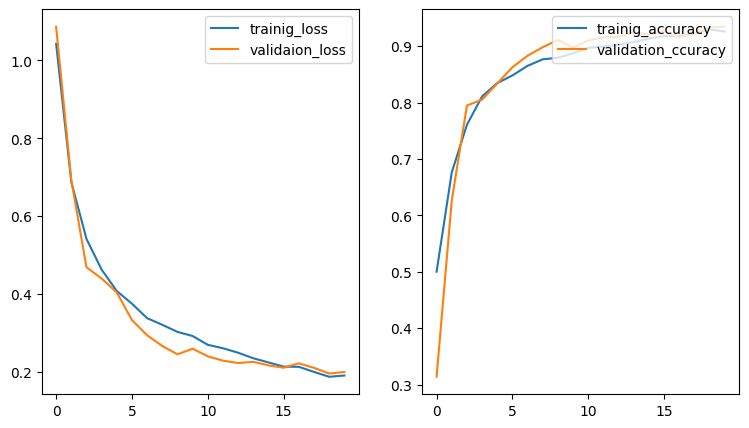

In [212]:

fig, ax = plt.subplots(1,2, figsize = (9,5))
ax[0].plot(loss, label = "trainig_loss")
ax[0].plot(val_loss, label = "validaion_loss")
ax[0].legend(loc = 'upper right')


ax[1].plot(accuracy, label = "trainig_accuracy")
ax[1].plot(val_accuracy, label = "validation_ccuracy")
ax[1].legend(loc = 'upper right')

In [214]:
model.save("wieght_bias.h5")

In [215]:
json_file = model.to_json()
with open("emotiondetector.json", "w") as f:
    f.write(json_file)

In [224]:
path = "C:/Users/khann/OneDrive/Desktop/05-12-21-happy-people.jpg"
image = cv2.imread(path)
image = cv2.resize(image, (48,48))
image = image.reshape(1,48,48,3)
print(image.shape)
model.predict(image)

(1, 48, 48, 3)
1/1 [==============================] - 0s 25ms/step


array([[0., 0., 1.]], dtype=float32)

In [221]:
model.save('emotion_Detection_model.keras')

In [161]:
keras.models.load_model("C:/Users/khann/emotion_Detection_model.keras")

In [ ]:
keras.__version__

In [ ]:
tf.__version__